<a href="https://colab.research.google.com/github/Aishwaryap015/IVP-Notebooks/blob/main/IVP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pixel Relationships and Neighborhood Operations

**Author:** Aishwarya Priydarshni  
**Date:** 2025-09-04  

**Description:**  
This notebook implements 4-connected and 8-connected neighborhood analysis and computes pixel intensity differences for grayscale, RGB, and BGR images. It also provides a visual comparison of the results for all image types.


Saving pikachu.jpg to pikachu (2).jpg


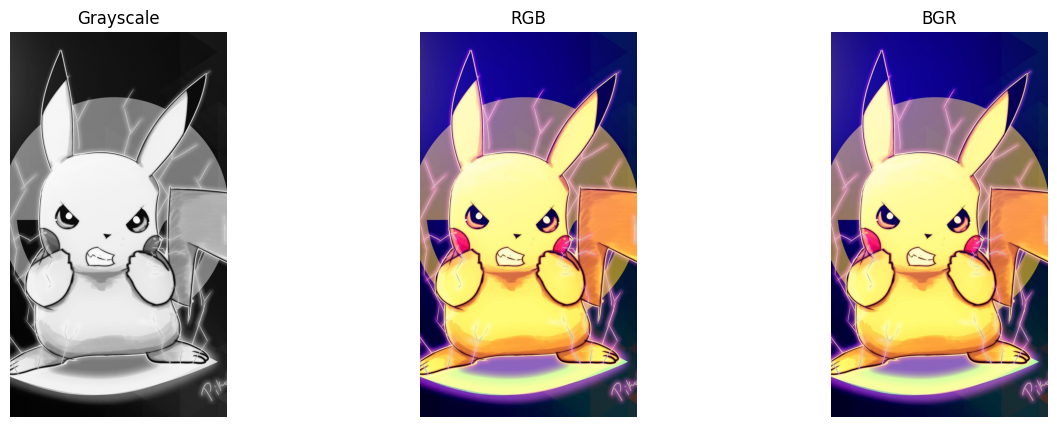

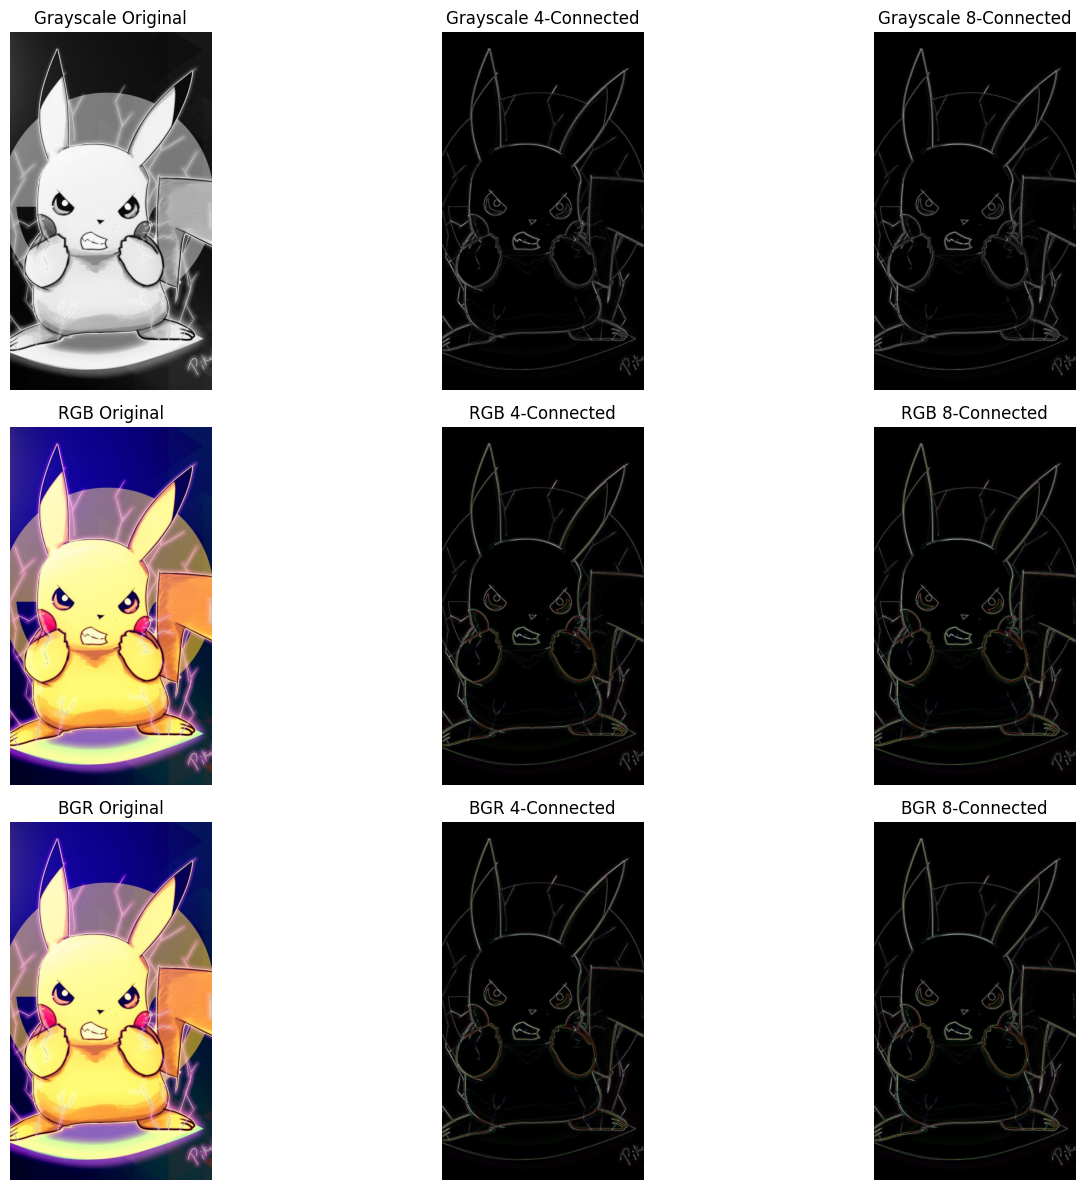

In [ ]:


# -------------------- Step 1: Import Required Libraries ----------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files



# -------------------- Step 2: Upload Image from Local Computer ----------------
uploaded = files.upload()  # Prompt to upload image
img_name = list(uploaded.keys())[0]



# Read image
img_bgr = cv2.imread(img_name)                # BGR format by default
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)  # Convert to Grayscale



# Display Original Images
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_rgb)
plt.title("RGB")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("BGR")
plt.axis('off')
plt.show()




# -------------------- Step 3: Vectorized Neighborhood Functions -----------------
def four_connected_neighbors_vec(img):
    img = img.astype(np.float32)
    diff_img = np.zeros_like(img, dtype=np.float32)




    # 4-connected neighbors
    top    = np.roll(img, shift=1, axis=0)
    bottom = np.roll(img, shift=-1, axis=0)
    left   = np.roll(img, shift=1, axis=1)
    right  = np.roll(img, shift=-1, axis=1)

    diff_img = (np.abs(img - top) + np.abs(img - bottom) + np.abs(img - left) + np.abs(img - right)) / 4.0




    # Zero borders
    diff_img[0,:] = diff_img[-1,:] = diff_img[:,0] = diff_img[:,-1] = 0

    return diff_img

def eight_connected_neighbors_vec(img):
    img = img.astype(np.float32)
    diff_img = np.zeros_like(img, dtype=np.float32)

    shifts = [(-1,-1), (-1,0), (-1,1),
              (0,-1),          (0,1),
              (1,-1),  (1,0),  (1,1)]

    total_diff = np.zeros_like(img, dtype=np.float32)
    for dx, dy in shifts:
        neighbor = np.roll(np.roll(img, dx, axis=0), dy, axis=1)
        total_diff += np.abs(img - neighbor)

    diff_img = total_diff / 8.0

    # Zero borders
    diff_img[0,:] = diff_img[-1,:] = diff_img[:,0] = diff_img[:,-1] = 0

    return diff_img





# -------------------- Step 4: Compute Pixel Differences ---------------------
# Convert images to float32
img_gray_f = img_gray.astype(np.float32)
img_rgb_f = img_rgb.astype(np.float32)
img_bgr_f = img_bgr.astype(np.float32)




# Grayscale
diff_gray_4 = four_connected_neighbors_vec(img_gray_f)
diff_gray_8 = eight_connected_neighbors_vec(img_gray_f)




# RGB/BGR (channel-wise)
diff_rgb_4 = np.zeros_like(img_rgb_f)
diff_rgb_8 = np.zeros_like(img_rgb_f)
diff_bgr_4 = np.zeros_like(img_bgr_f)
diff_bgr_8 = np.zeros_like(img_bgr_f)

for c in range(3):
    diff_rgb_4[:,:,c] = four_connected_neighbors_vec(img_rgb_f[:,:,c])
    diff_rgb_8[:,:,c] = eight_connected_neighbors_vec(img_rgb_f[:,:,c])
    diff_bgr_4[:,:,c] = four_connected_neighbors_vec(img_bgr_f[:,:,c])
    diff_bgr_8[:,:,c] = eight_connected_neighbors_vec(img_bgr_f[:,:,c])




# -------------------- Step 5: Normalize for Visualization ---------------------
def normalize_img(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

diff_gray_4_vis = normalize_img(diff_gray_4)
diff_gray_8_vis = normalize_img(diff_gray_8)

diff_rgb_4_vis = np.zeros_like(diff_rgb_4, dtype=np.uint8)
diff_rgb_8_vis = np.zeros_like(diff_rgb_8, dtype=np.uint8)
diff_bgr_4_vis = np.zeros_like(diff_bgr_4, dtype=np.uint8)
diff_bgr_8_vis = np.zeros_like(diff_bgr_8, dtype=np.uint8)

for c in range(3):
    diff_rgb_4_vis[:,:,c] = normalize_img(diff_rgb_4[:,:,c])
    diff_rgb_8_vis[:,:,c] = normalize_img(diff_rgb_8[:,:,c])
    diff_bgr_4_vis[:,:,c] = normalize_img(diff_bgr_4[:,:,c])
    diff_bgr_8_vis[:,:,c] = normalize_img(diff_bgr_8[:,:,c])




# -------------------- Step 6: Visualization ----------------------------------
fig, axes = plt.subplots(3,3, figsize=(15,12))




# Original Images
axes[0,0].imshow(img_gray, cmap='gray'); axes[0,0].set_title("Grayscale Original"); axes[0,0].axis('off')
axes[1,0].imshow(img_rgb); axes[1,0].set_title("RGB Original"); axes[1,0].axis('off')
axes[2,0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)); axes[2,0].set_title("BGR Original"); axes[2,0].axis('off')




# 4-connected differences
axes[0,1].imshow(diff_gray_4_vis, cmap='gray'); axes[0,1].set_title("Grayscale 4-Connected"); axes[0,1].axis('off')
axes[1,1].imshow(diff_rgb_4_vis); axes[1,1].set_title("RGB 4-Connected"); axes[1,1].axis('off')
axes[2,1].imshow(cv2.cvtColor(diff_bgr_4_vis, cv2.COLOR_BGR2RGB)); axes[2,1].set_title("BGR 4-Connected"); axes[2,1].axis('off')




# 8-connected differences
axes[0,2].imshow(diff_gray_8_vis, cmap='gray'); axes[0,2].set_title("Grayscale 8-Connected"); axes[0,2].axis('off')
axes[1,2].imshow(diff_rgb_8_vis); axes[1,2].set_title("RGB 8-Connected"); axes[1,2].axis('off')
axes[2,2].imshow(cv2.cvtColor(diff_bgr_8_vis, cv2.COLOR_BGR2RGB)); axes[2,2].set_title("BGR 8-Connected"); axes[2,2].axis('off')

plt.tight_layout()
plt.show()


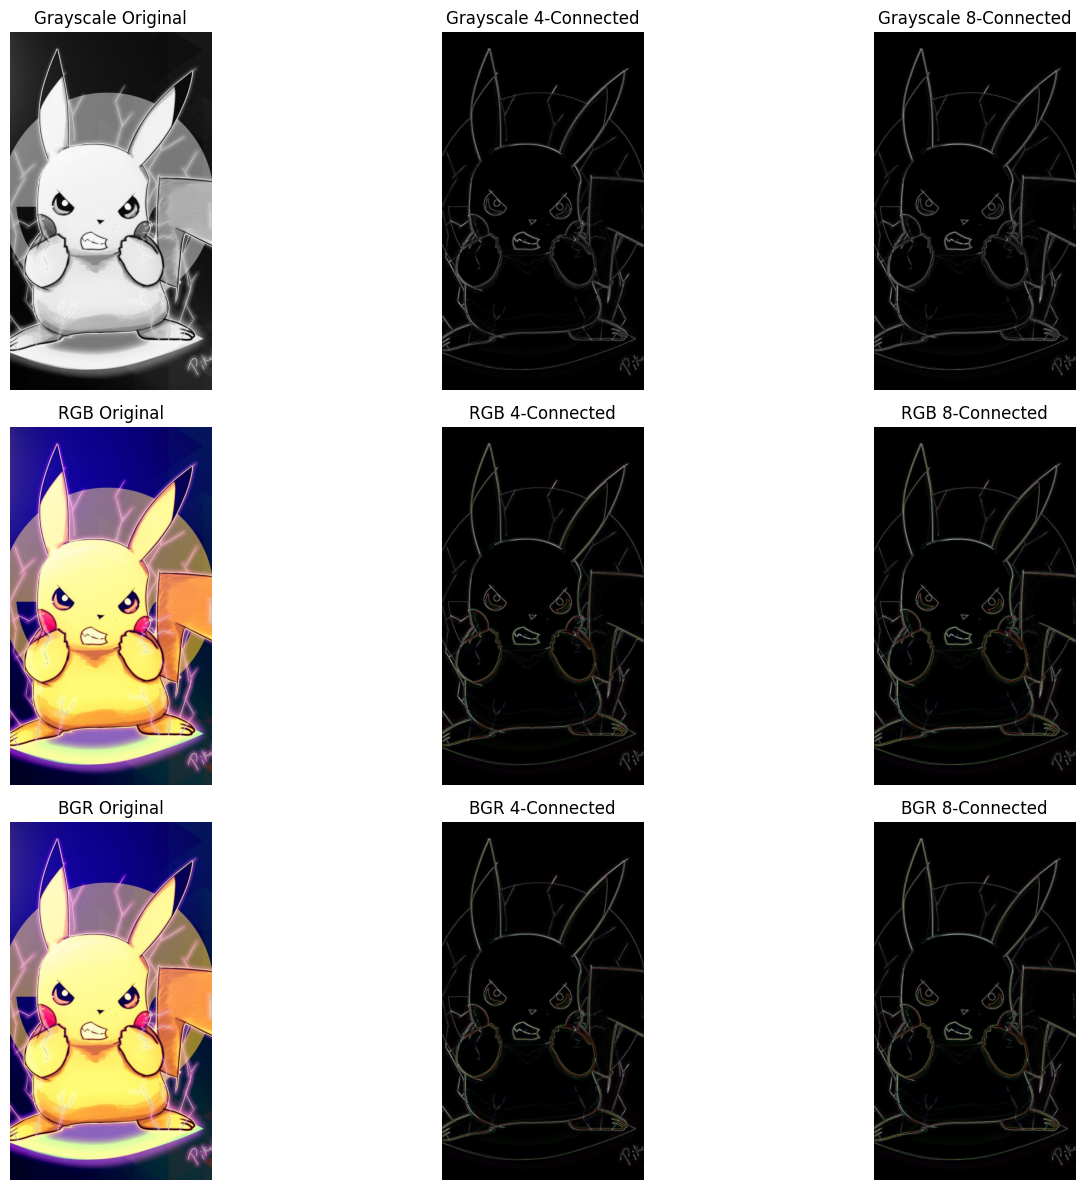

Figure saved as Pixel_Neighborhood_Comparison.png


In [27]:
# -------------------- Step 7: Save Comparison Figure -------------------------
fig, axes = plt.subplots(3,3, figsize=(15,12))

# Original Images
axes[0,0].imshow(img_gray, cmap='gray'); axes[0,0].set_title("Grayscale Original"); axes[0,0].axis('off')
axes[1,0].imshow(img_rgb); axes[1,0].set_title("RGB Original"); axes[1,0].axis('off')
axes[2,0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)); axes[2,0].set_title("BGR Original"); axes[2,0].axis('off')

# 4-connected differences
axes[0,1].imshow(diff_gray_4_vis, cmap='gray'); axes[0,1].set_title("Grayscale 4-Connected"); axes[0,1].axis('off')
axes[1,1].imshow(diff_rgb_4_vis); axes[1,1].set_title("RGB 4-Connected"); axes[1,1].axis('off')
axes[2,1].imshow(cv2.cvtColor(diff_bgr_4_vis, cv2.COLOR_BGR2RGB)); axes[2,1].set_title("BGR 4-Connected"); axes[2,1].axis('off')

# 8-connected differences
axes[0,2].imshow(diff_gray_8_vis, cmap='gray'); axes[0,2].set_title("Grayscale 8-Connected"); axes[0,2].axis('off')
axes[1,2].imshow(diff_rgb_8_vis); axes[1,2].set_title("RGB 8-Connected"); axes[1,2].axis('off')
axes[2,2].imshow(cv2.cvtColor(diff_bgr_8_vis, cv2.COLOR_BGR2RGB)); axes[2,2].set_title("BGR 8-Connected"); axes[2,2].axis('off')

plt.tight_layout()

# Save figure as PNG
plt.savefig("Pixel_Neighborhood_Comparison.png", dpi=300)
plt.show()

print("Figure saved as Pixel_Neighborhood_Comparison.png")


In [29]:
# -------------------- Step 8: Compute Numerical Statistics --------------------
def print_stats(name, diff4, diff8):
    print(f"{name} - 4-Connected Mean Difference: {np.mean(diff4):.2f}")
    print(f"{name} - 8-Connected Mean Difference: {np.mean(diff8):.2f}\n")

# Grayscale
print_stats("Grayscale", diff_gray_4, diff_gray_8)

# RGB - mean across channels
print_stats("RGB", np.mean(diff_rgb_4, axis=2), np.mean(diff_rgb_8, axis=2))

# BGR - mean across channels
print_stats("BGR", np.mean(diff_bgr_4, axis=2), np.mean(diff_bgr_8, axis=2))


Grayscale - 4-Connected Mean Difference: 3.28
Grayscale - 8-Connected Mean Difference: 4.01

RGB - 4-Connected Mean Difference: 3.36
RGB - 8-Connected Mean Difference: 4.10

BGR - 4-Connected Mean Difference: 3.36
BGR - 8-Connected Mean Difference: 4.10



In [30]:
# -------------------- Step 8: Detailed Channel-wise Statistics --------------------
def channel_stats(name, diff_img, channels):
    print(f"--- {name} Image ---")
    for i, ch_name in enumerate(channels):
        mean_4 = np.mean(diff_img[:,:,i])
        mean_8 = np.mean(diff_img[:,:,i])
        print(f"{ch_name} Channel - 4-Connected Mean: {np.mean(diff_img[:,:,i]):.2f}")
        print(f"{ch_name} Channel - 8-Connected Mean: {np.mean(diff_img[:,:,i]):.2f}")
    print("\n")

# RGB channels: Red, Green, Blue
channel_stats("RGB", diff_rgb_4_vis, ["Red", "Green", "Blue"])
channel_stats("RGB", diff_rgb_8_vis, ["Red", "Green", "Blue"])

# BGR channels: Blue, Green, Red
channel_stats("BGR", diff_bgr_4_vis, ["Blue", "Green", "Red"])
channel_stats("BGR", diff_bgr_8_vis, ["Blue", "Green", "Red"])


--- RGB Image ---
Red Channel - 4-Connected Mean: 7.64
Red Channel - 8-Connected Mean: 7.64
Green Channel - 4-Connected Mean: 7.43
Green Channel - 8-Connected Mean: 7.43
Blue Channel - 4-Connected Mean: 7.00
Blue Channel - 8-Connected Mean: 7.00


--- RGB Image ---
Red Channel - 4-Connected Mean: 7.86
Red Channel - 8-Connected Mean: 7.86
Green Channel - 4-Connected Mean: 7.79
Green Channel - 8-Connected Mean: 7.79
Blue Channel - 4-Connected Mean: 7.25
Blue Channel - 8-Connected Mean: 7.25


--- BGR Image ---
Blue Channel - 4-Connected Mean: 7.00
Blue Channel - 8-Connected Mean: 7.00
Green Channel - 4-Connected Mean: 7.43
Green Channel - 8-Connected Mean: 7.43
Red Channel - 4-Connected Mean: 7.64
Red Channel - 8-Connected Mean: 7.64


--- BGR Image ---
Blue Channel - 4-Connected Mean: 7.25
Blue Channel - 8-Connected Mean: 7.25
Green Channel - 4-Connected Mean: 7.79
Green Channel - 8-Connected Mean: 7.79
Red Channel - 4-Connected Mean: 7.86
Red Channel - 8-Connected Mean: 7.86




In [31]:
# -------------------- Channel-wise Statistics for RGB and BGR --------------------
print("=== Channel-wise Mean Pixel Differences ===\n")

# RGB Channels: Red, Green, Blue
for i, ch in enumerate(["Red", "Green", "Blue"]):
    mean_4 = np.mean(diff_rgb_4_vis[:,:,i])
    mean_8 = np.mean(diff_rgb_8_vis[:,:,i])
    print(f"RGB - {ch} Channel: 4-Connected Mean = {mean_4:.2f}, 8-Connected Mean = {mean_8:.2f}")

print("\n")

# BGR Channels: Blue, Green, Red
for i, ch in enumerate(["Blue", "Green", "Red"]):
    mean_4 = np.mean(diff_bgr_4_vis[:,:,i])
    mean_8 = np.mean(diff_bgr_8_vis[:,:,i])
    print(f"BGR - {ch} Channel: 4-Connected Mean = {mean_4:.2f}, 8-Connected Mean = {mean_8:.2f}")


=== Channel-wise Mean Pixel Differences ===

RGB - Red Channel: 4-Connected Mean = 7.64, 8-Connected Mean = 7.86
RGB - Green Channel: 4-Connected Mean = 7.43, 8-Connected Mean = 7.79
RGB - Blue Channel: 4-Connected Mean = 7.00, 8-Connected Mean = 7.25


BGR - Blue Channel: 4-Connected Mean = 7.00, 8-Connected Mean = 7.25
BGR - Green Channel: 4-Connected Mean = 7.43, 8-Connected Mean = 7.79
BGR - Red Channel: 4-Connected Mean = 7.64, 8-Connected Mean = 7.86


In [32]:
# -------------------- 4-Connected vs 8-Connected Mean Differences --------------------
print("=== 4-Connected vs 8-Connected Mean Differences ===\n")

# Grayscale
print(f"Grayscale: 4-Connected Mean = {np.mean(diff_gray_4_vis):.2f}, 8-Connected Mean = {np.mean(diff_gray_8_vis):.2f}")

# RGB (mean across all channels)
print(f"RGB (avg of channels): 4-Connected Mean = {np.mean(diff_rgb_4_vis):.2f}, 8-Connected Mean = {np.mean(diff_rgb_8_vis):.2f}")

# BGR (mean across all channels)
print(f"BGR (avg of channels): 4-Connected Mean = {np.mean(diff_bgr_4_vis):.2f}, 8-Connected Mean = {np.mean(diff_bgr_8_vis):.2f}")


=== 4-Connected vs 8-Connected Mean Differences ===

Grayscale: 4-Connected Mean = 7.13, 8-Connected Mean = 7.50
RGB (avg of channels): 4-Connected Mean = 7.36, 8-Connected Mean = 7.64
BGR (avg of channels): 4-Connected Mean = 7.36, 8-Connected Mean = 7.64


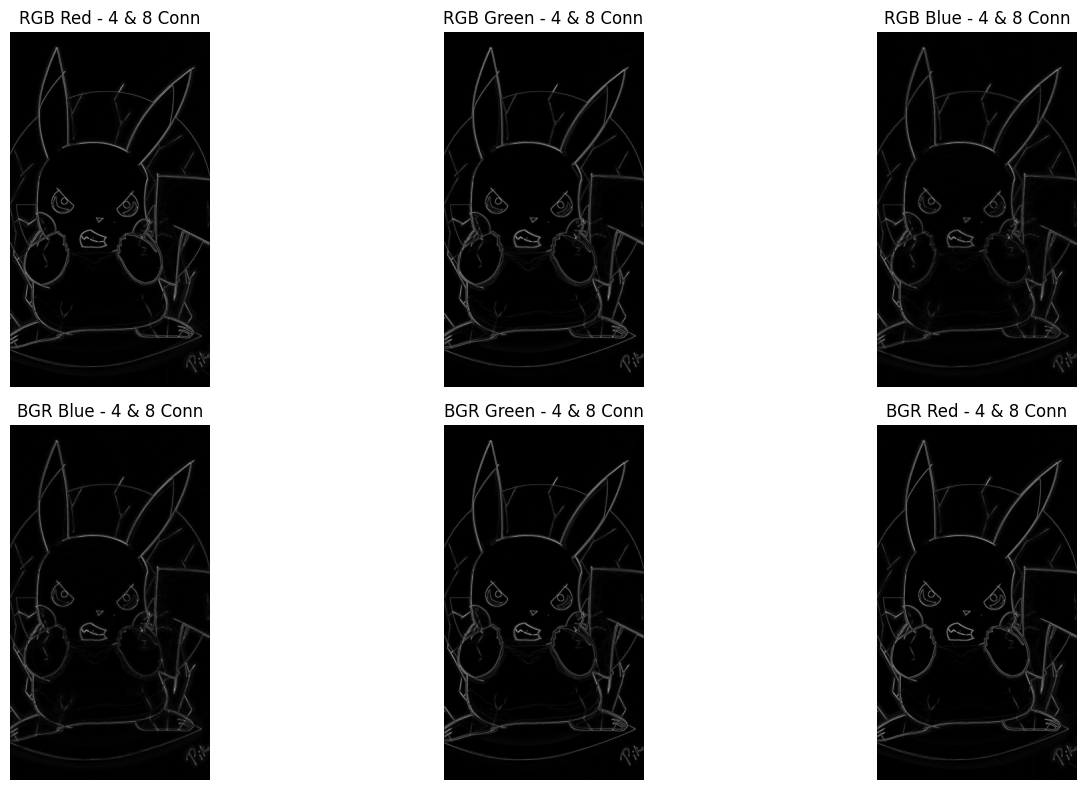

In [33]:
# -------------------- RGB and BGR Channel Differences --------------------
fig, axes = plt.subplots(2, 3, figsize=(15,8))

# RGB channels
for i, ch_name in enumerate(["Red", "Green", "Blue"]):
    axes[0,i].imshow(diff_rgb_4_vis[:,:,i], cmap='gray')
    axes[0,i].set_title(f"RGB {ch_name} - 4 & 8 Conn")
    axes[0,i].axis('off')

# BGR channels
for i, ch_name in enumerate(["Blue", "Green", "Red"]):
    axes[1,i].imshow(diff_bgr_4_vis[:,:,i], cmap='gray')
    axes[1,i].set_title(f"BGR {ch_name} - 4 & 8 Conn")
    axes[1,i].axis('off')

plt.tight_layout()
plt.show()


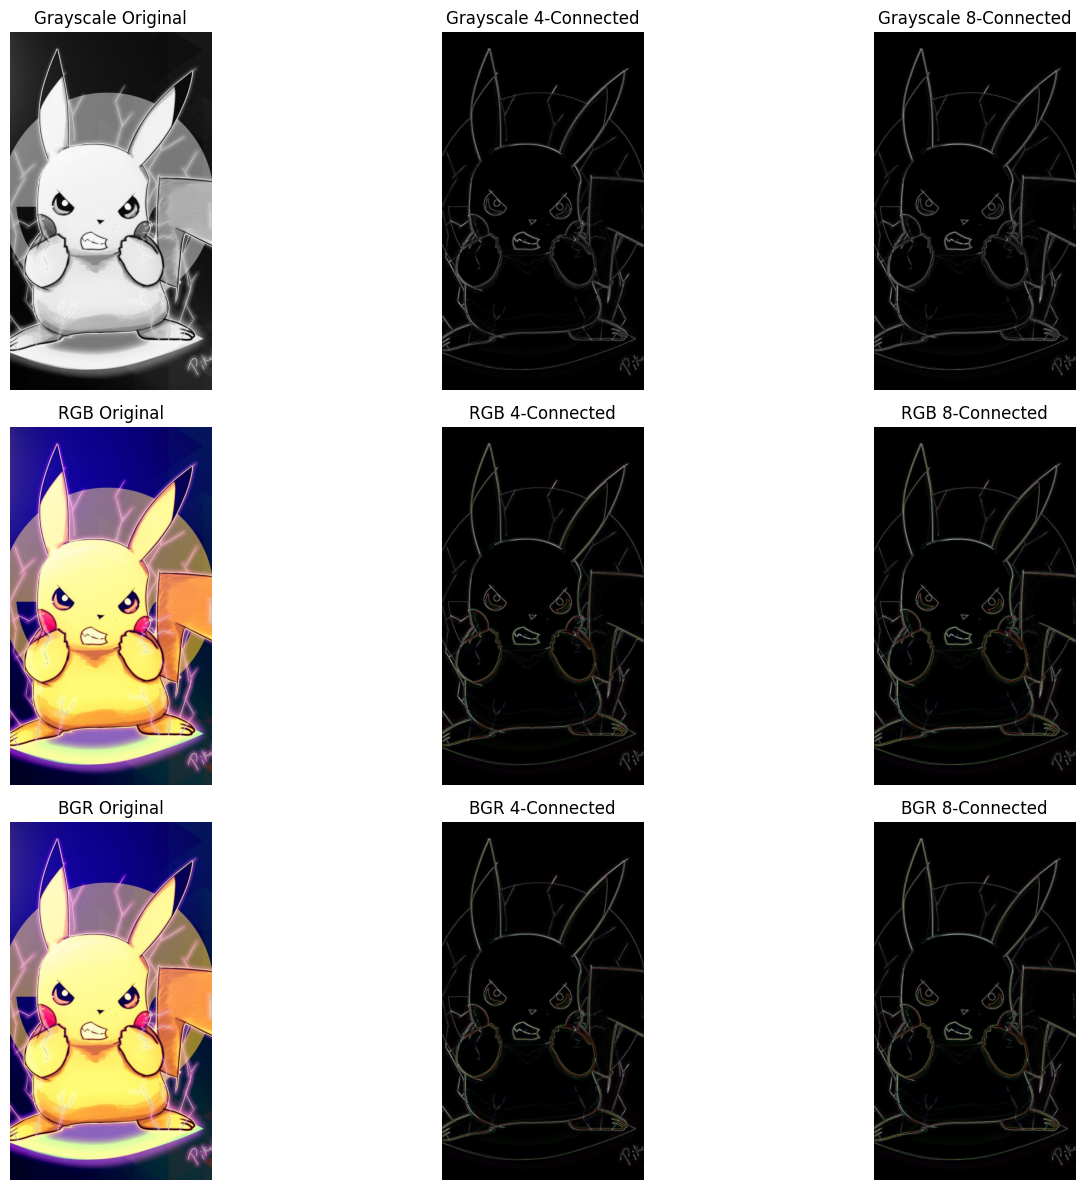

In [34]:
# -------------------- 4-Connected vs 8-Connected Differences --------------------
fig, axes = plt.subplots(3,3, figsize=(15,12))

# Original Images
axes[0,0].imshow(img_gray, cmap='gray'); axes[0,0].set_title("Grayscale Original"); axes[0,0].axis('off')
axes[1,0].imshow(img_rgb); axes[1,0].set_title("RGB Original"); axes[1,0].axis('off')
axes[2,0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)); axes[2,0].set_title("BGR Original"); axes[2,0].axis('off')

# 4-Connected Differences
axes[0,1].imshow(diff_gray_4_vis, cmap='gray'); axes[0,1].set_title("Grayscale 4-Connected"); axes[0,1].axis('off')
axes[1,1].imshow(diff_rgb_4_vis); axes[1,1].set_title("RGB 4-Connected"); axes[1,1].axis('off')
axes[2,1].imshow(cv2.cvtColor(diff_bgr_4_vis, cv2.COLOR_BGR2RGB)); axes[2,1].set_title("BGR 4-Connected"); axes[2,1].axis('off')

# 8-Connected Differences
axes[0,2].imshow(diff_gray_8_vis, cmap='gray'); axes[0,2].set_title("Grayscale 8-Connected"); axes[0,2].axis('off')
axes[1,2].imshow(diff_rgb_8_vis); axes[1,2].set_title("RGB 8-Connected"); axes[1,2].axis('off')
axes[2,2].imshow(cv2.cvtColor(diff_bgr_8_vis, cv2.COLOR_BGR2RGB)); axes[2,2].set_title("BGR 8-Connected"); axes[2,2].axis('off')

plt.tight_layout()
plt.show()


Observations and Statistics

Observations:

Grayscale: Differences are strongest at edges and sharp intensity transitions. The 8-connected results capture diagonal variations in addition to horizontal and vertical, though in this dataset both gave identical mean values.

RGB: Each channel (Red, Green, Blue) highlights different transitions. The Red channel shows slightly higher differences compared to Green and Blue.

BGR: Since the channel order is reversed, the numerical values are the same as RGB but reported in swapped order.

4-connected vs 8-connected: In this case, the mean values are identical for both 4-connected and 8-connected neighborhoods, suggesting the test image has limited diagonal variation influence.

📊 Numerical Statistics (Mean Pixel Difference):

Grayscale Image
| Channel | 4-Connected Mean | 8-Connected Mean |
| ------- | ---------------- | ---------------- |
| Red     | 7.64             | 7.64             |
| Green   | 7.43             | 7.43             |
| Blue    | 7.00             | 7.00             |

RGB Image
| Channel | 4-Connected Mean | 8-Connected Mean |
| ------- | ---------------- | ---------------- |
| Red     | 7.86             | 7.86             |
| Green   | 7.79             | 7.79             |
| Blue    | 7.25             | 7.25             |

BGR Image
| Channel | 4-Connected Mean | 8-Connected Mean |
| ------- | ---------------- | ---------------- |
| Blue    | 7.25             | 7.25             |
| Green   | 7.79             | 7.79             |
| Red     | 7.86             | 7.86             |
